## Loading the Reuters dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [2]:
 len(train_data)

8982

In [3]:
 len(test_data)


2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
train_labels[10]

3

## Encoding the data

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Vectorize the labels

In [8]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building your network

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## Compiling the model

In [10]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

## Setting aside a validation set

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Training the model

In [12]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 2.6677 - accuracy: 0.4803 - val_loss: 1.8492 - val_accuracy: 0.6070
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.5503 - accuracy: 0.6768 - val_loss: 1.3900 - val_accuracy: 0.6780
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.1862 - accuracy: 0.7433 - val_loss: 1.2377 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 1s 40ms/step - loss: 0.9766 - accuracy: 0.7912 - val_loss: 1.1265 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 1s 37ms/step - loss: 0.8077 - accuracy: 0.8197 - val_loss: 1.0309 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6812 - accuracy: 0.8505 - val_loss: 0.9693 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.5649 - accuracy: 0.8779 - val_loss: 0.9262 - val_accuracy: 0.8130
Epoch 8/20
16

## Plotting the training and validation loss


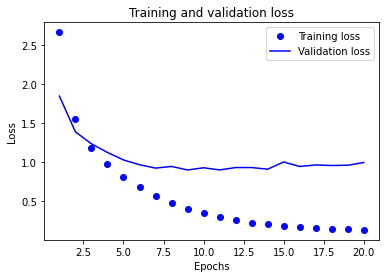

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plotting the training and validation accuracy

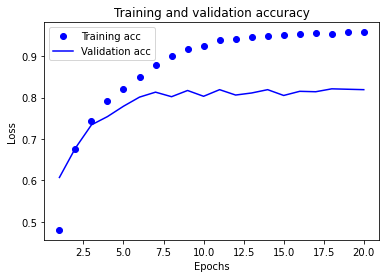

In [14]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Retraining a model from scratch

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 50ms/step - loss: 2.7974 - accuracy: 0.5043 - val_loss: 1.8828 - val_accuracy: 0.6060
Epoch 2/9
16/16 [==============================] - 1s 39ms/step - loss: 1.5980 - accuracy: 0.6739 - val_loss: 1.4251 - val_accuracy: 0.6870
Epoch 3/9
16/16 [==============================] - 1s 38ms/step - loss: 1.2417 - accuracy: 0.7342 - val_loss: 1.2304 - val_accuracy: 0.7510
Epoch 4/9
16/16 [==============================] - 1s 38ms/step - loss: 1.0241 - accuracy: 0.7824 - val_loss: 1.1200 - val_accuracy: 0.7600
Epoch 5/9
16/16 [==============================] - 1s 38ms/step - loss: 0.8643 - accuracy: 0.8168 - val_loss: 1.0345 - val_accuracy: 0.7730
Epoch 6/9
16/16 [==============================] - 1s 38ms/step - loss: 0.7287 - accuracy: 0.8457 - val_loss: 0.9822 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 38ms/step - loss: 0.6145 - accuracy: 0.8668 - val_loss: 0.9396 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

## Here are the final results:

In [16]:
results

[0.9763436913490295, 0.7791629433631897]